<a href="https://colab.research.google.com/github/YoneDelCastillo/Nonlinear-Maxwells-Eq.-FDTD/blob/main/TFG_2D_lineal_con_geometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#===========================

 ####  ###    #####   ###
 #     #  #     #     #  #
 ###   #   #    #     #   #
 #     #  #     #     #  #
 #     ###      #     ###

#===========================

In [ ]:
#MODULOS DE PYTHON

#Librerías:
#Para cálculos y gráficas:
import numpy as np
import matplotlib.pyplot as plt
#Para la animación:
import matplotlib.animation as animation

#FUNCIONES ÚTILES
def gaussian(x,y,x0,y0,a,b):
  return np.exp(-(x-x0)**2/(2*a**2)-(y-y0)**2/(2*b**2))

def cross(A,B):
  return np.array([A[1]*B[2],-A[0]*B[2]])

In [ ]:
#DEFINICION DE VARIABLES Y PARAMETROS

#Número de puntos espaciales
Lx = 2
dx = 0.02
Ly = 1
dy = 0.02

Nx = int(Lx/dx)+2
Ny = int(Ly/dy)+2

#Número de intervalos temporales
T = 2.5
dt = 0.0001

Nt = int(T/dt)

#Constantes físicas

# σ/ε = a
a = 0
# σ*/μ = b
b = 0
# ε
e = 1
# μ
u = 1

#Definicion de los campos
Ex = np.zeros((Ny,Nx,Nt))
Ey = np.zeros((Ny,Nx,Nt))
Hz = np.zeros((Ny,Nx,Nt))

#Definimos los campos virtuales que almacenarán temporalmente el nuevo valor del campo
Ex_virtual = np.zeros((Ny,Nx))
Ey_virtual = np.zeros((Ny,Nx))
Hz_virtual = np.zeros((Ny,Nx))

# CONDICIÓN INICIAL
#Posición
X0 = 0.2*Lx
Y0 = 0.5*Ly
#Anchura de la gaussiana
sigma_x = 0.08
sigma_y = 0.2
#Número de onda
Kx = 2*np.pi/(0.15*Lx)

# Imponemos las condiciones iniciales a Ey y Hz

#PULSO ONDA PLANA
for j in np.arange(1,Ny-1):
  for i in np.arange(1,Nx-1):
    Ey[j,i,0] = gaussian(      i*dx,(j+1/2)*dy,X0,Y0,sigma_x,sigma_y)*np.cos(Kx*(      i*dx-X0))
    Hz[j,i,0] = gaussian((i+1/2)*dx,(j+1/2)*dy,X0,Y0,sigma_x,sigma_y)*np.cos(Kx*((i+1/2)*dx-X0))
"""
#ONDA ESFÉRICA
#radio
sigma = 0.12

for j in np.arange(1,Ny-1):
  for i in np.arange(1,Nx-1):
    Ey[j,i,0] =  (i*dx - X0)/np.sqrt( (i*dx - X0)**2 + ((j+1/2)*dy -Y0)**2 )*gaussian(i*dx,(j+1/2)*dy,X0,Y0,sigma,sigma)*np.sin(Kx*np.sqrt( (i*dx - X0)**2 + ((j+1/2)*dy - Y0)**2 ))
    Ex[j,i,0] = -(j*dx - Y0)/np.sqrt( ((i+1/2)*dx - X0)**2 + (j*dy -Y0)**2 )*gaussian((i+1/2)*dx,j*dy,X0,Y0,sigma,sigma)*np.sin(Kx*np.sqrt( ((i+1/2)*dx - X0)**2 + (j*dy - Y0)**2 ))
    Hz[j,i,0] =  gaussian((i+1/2)*dx,(j+1/2)*dy,X0,Y0,sigma,sigma)
"""

# Campo vectorial

#Número puntos que se salta para la representación
Salto = 3
#Malla de puntos
X,Y = np.meshgrid(np.arange(0,Nx-1,Salto),np.arange(0,Ny-1,Salto))
#Arrays reducidos
Ny_q, Nx_q = np.shape(X)
Ey_q = np.zeros((Ny_q,Nx_q,Nt))
Ex_q = np.zeros((Ny_q,Nx_q,Nt))
Hz_q = np.zeros((Ny_q,Nx_q,Nt))

#Copiamos la información a los arrays reducidos
for j in np.arange(0,Ny_q):
  for i in np.arange(0,Nx_q):
    Ey_q[j,i,0] = Ey[Salto*j,Salto*i,0]
    Ex_q[j,i,0] = Ex[Salto*j,Salto*i,0]
    Hz_q[j,i,0] = Hz[Salto*j,Salto*i,0]

#Color de las flechas
#color = Ey_q[:,:,0]
color = np.sqrt(Ex_q[:,:,0]**2+Ey_q[:,:,0]**2)
#color = Ey_q[:,:,0]+Ex_q[:,:,0]

geometria = False
geo = None

print(f"Dimensiones del retículo: {Nx}x{Ny}")

Dimensiones del retículo: 102x52


In [ ]:
#GEOMETRÍA DE PERMITIVIDAD

geo = np.ones((Ny,Nx)) #Homogéneo por defecto
n_i = 1.75 #Índice de fracción

geometria = True

In [ ]:
#Círculo
geo = np.ones((Ny,Nx))

R = 0.20*np.sqrt(Nx*Ny) #Radio del círculo
X0 = 0.6*Nx             #Centro del círculo
Y0 = 0.5*Ny

def dist(x,y,x0,y0):
  D = np.sqrt((x-x0)**2+(y-y0)**2)
  return D

for j in np.arange(0,Ny):
  for i in np.arange(0,Nx):
    if dist(i,j,X0,Y0) <= R:
      geo[j,i] = n_i

ang = np.arange(0,2*np.pi+0.08,0.08)
x = R*np.cos(ang)+X0
y = R*np.sin(ang)+Y0

e = geo
u = geo

geom_type="circulo"

In [ ]:
#Superficie plana
geo = np.ones((Ny,Nx))

ang = 65*(np.pi/180)  #Ángulo con respecto al eje x
X0 = 0.4*Nx           #Distancia al origen

for j in np.arange(0,Ny):
  for i in np.arange(0,Nx):
    if j <= np.tan(ang)*(i-X0):
      geo[j,i] = n_i

x = np.arange(0,Nx+0.1,0.1)
y = np.tan(ang)*(x-X0)

e = geo
u = geo

geom_type="superficie_plana"

In [ ]:
#Parabólica
geo = np.ones((Ny,Nx))

a = 1/np.sqrt(Nx*Ny)
X0 = 0.33*Nx
Y0 = 0.5*Ny

for j in np.arange(0,Ny):
  for i in np.arange(0,Nx):
    if i-X0 >= a*(j-Y0)**2:
      geo[j,i] = n_i

y = np.arange(0,Ny+0.05,0.05)
x = a*(y-Y0)**2+X0

e = geo
u = geo

geom_type="parabolica"

In [ ]:
#Arbitraria
geo = np.ones((Ny,Nx))

imagen = plt.imread("Geom_3.png")
for j in np.arange(0,Ny):
  for i in np.arange(0,Nx):
    if imagen[Ny-1-j,i,0] == 0:
      geo[j,i] = n_i

e = geo
u = geo

geom_type="arbitraria"

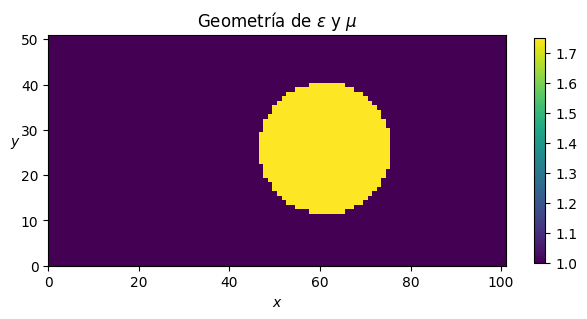

In [ ]:
#Representamos la geometría de las permitividades
plt.imshow(e,origin="lower")
plt.colorbar(shrink=Ly/Lx)
plt.title("Geometría de $\epsilon$ y $\mu$")
plt.xlabel("$x$")
plt.ylabel("$y$",rotation=0)
plt.xlim(0,Nx-1)
plt.ylim(0,Ny-1)
#plt.plot(x,y,"k-",linewidth=2)
plt.tight_layout()

In [ ]:
#Geometría OPACA arbitraria

geo = np.ones((Ny,Nx))

nom_geom = "Geom_Rendija.png"
imagen = plt.imread(nom_geom)
for j in np.arange(0,Ny):
  for i in np.arange(0,Nx):
    if imagen[Ny-1-j,i,0] != 1 or imagen[Ny-1-j,i,1] != 1 or imagen[Ny-1-j,i,2] != 1 :
      geo[j,i] = 0

#La imponemos también como condición inicial
Ex[:,:,0] = geo*Ex[:,:,0]
Ey[:,:,0] = geo*Ey[:,:,0]
Hz[:,:,0] = geo*Hz[:,:,0]

#Campo vectorial
#Copiamos ka información a los arrays reducidos
for j in np.arange(0,Ny_q):
  for i in np.arange(0,Nx_q):
    Ey_q[j,i,0] = Ey[Salto*j,Salto*i,0]
    Ex_q[j,i,0] = Ex[Salto*j,Salto*i,0]
    Hz_q[j,i,0] = Hz[Salto*j,Salto*i,0]

#Color de las flechas
color = np.sqrt(Ex_q[:,:,0]**2+Ey_q[:,:,0]**2)
#color = Ey_q[:,:,0]+Ex_q[:,:,0]
#color = Ey_q[:,:,0]

geom_type="Opaca_arbitraria"

(0.0, 51.0)

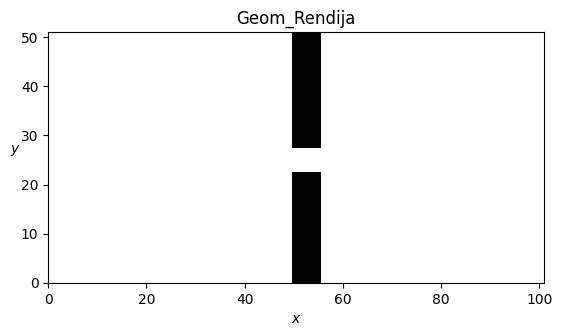

In [ ]:
#Representamos la geometría opaca
plt.imshow(geo,cmap="Greys_r",origin="lower")
#plt.colorbar()
plt.title(nom_geom[:-4])
plt.xlabel("$x$")
plt.ylabel("$y$",rotation=0)
plt.xlim(0,Nx-1)
plt.ylim(0,Ny-1)
#plt.plot(x,y,"k-",linewidth=2)

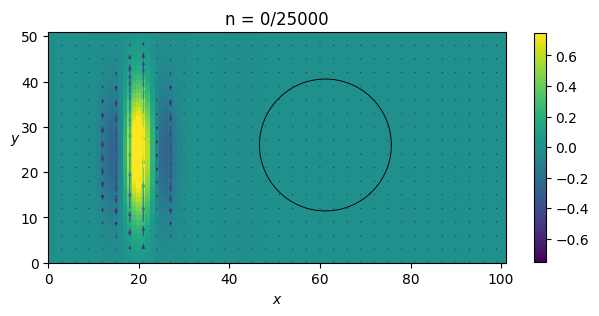

In [ ]:
#VISUALIZACIÓN DE LA CONDICIÓN INICAL

#Campo eléctrico vectorial
plt.quiver(X,Y,Ex_q[:,:,0],Ey_q[:,:,0],color,scale=7,units="width")

#Geometría opaca
if geom_type == "Opaca_arbitraria":
  plt.imshow(geo,cmap="Greys_r",vmin=0,vmax=1,origin="lower")

#Componente Ey
plt.imshow(Ey[:,:,0],vmin=-0.75,vmax=0.75,origin="lower")#,alpha=geo

#Frontera
plt.plot(x,y,"k-",linewidth=0.65)

#Ajustes de la figura
plt.title(f"n = 0/{Nt}")
plt.colorbar(shrink=Ny/Nx)
plt.xlabel("$x$")
plt.ylabel("$y$",rotation=0)
plt.xlim(0,Nx-1)
plt.ylim(0,Ny-1)
plt.tight_layout()

In [ ]:
# ALGORITMO DE YEE
# Conductividades σ,σ* ≠ 0
# ε y μ sin geometria

for n in range(Nt-1):
    print(f"\r{round(n/(Nt-1)*100,2)}%",end="\r")

    # Crear copias de los arrays actuales
    Hz_virtual = Hz[:, :, n].copy()
    Ey_virtual = Ey[:, :, n].copy()
    Ex_virtual = Ex[:, :, n].copy()

    # Aplicar el factor de actualización a los arrays virtuales
    Hz_virtual *= (1-0.5*b*dt)/(1+0.5*b*dt)
    Ey_virtual *= (1-0.5*a*dt)/(1+0.5*a*dt)
    Ex_virtual *= (1-0.5*a*dt)/(1+0.5*a*dt)

    # Actualizar los valores en los arrays virtuales
    Hz_virtual[1:-1, 1:-1] += ((dt/u)/(1+0.5*b*dt)) * ((Ey[1:-1, 1:-1,n] - Ey[1:-1, 2:  ,n]) / dx + (Ex[2:, 1:-1,n] - Ex[1:-1, 1:-1,n]) / dy)
    Ey_virtual[1:-1, 1:-1] += ((dt/e)/(1+0.5*a*dt)) * ((Hz_virtual[1:-1,  :-2] - Hz_virtual[1:-1, 1:-1]) / dx)
    Ex_virtual[1:-1, 1:-1] += ((dt/e)/(1+0.5*a*dt)) * ((Hz_virtual[1:-1, 1:-1] - Hz_virtual[ :-2, 1:-1]) / dy)

    # Copiar los valores actualizados de vuelta a los arrays originales
    Hz[:, :, n+1] = Hz_virtual
    Ey[:, :, n+1] = Ey_virtual
    Ex[:, :, n+1] = Ex_virtual



# CAMPO VECTORIAL
# Generar los índices directamente usando NumPy
indices_j = np.arange(0, Ny_q) * Salto
indices_i = np.arange(0, Nx_q) * Salto

# Bucle en n para la actualización del campo
for n in range(Nt):
    print(f"{round(n/(Nt-1)*100,2)}%", end="\r")
    Ey_q[:, :, n] = Ey[np.ix_(indices_j, indices_i, [n])].squeeze()
    Ex_q[:, :, n] = Ex[np.ix_(indices_j, indices_i, [n])].squeeze()
    Hz_q[:, :, n] = Hz[np.ix_(indices_j, indices_i, [n])].squeeze()

# Vector de Poynting
#S = cross([Ex,Ey,0],[0,0,Hz])
S = cross([Ex_q,Ey_q,0],[0,0,Hz_q])

color = np.sqrt(Ex_q**2 + Ey_q**2)


In [ ]:
# ALGORITMO DE YEE
# Conductividades σ,σ* = 0
# ε y μ sin geometria

for n in np.arange(0,Nt-1):
    print(f"\r{round(n/(Nt-1)*100,2)}%",end="\r")

    # Crear copias de los arrays actuales
    Hz_virtual = Hz[:, :, n].copy()
    Ey_virtual = Ey[:, :, n].copy()
    Ex_virtual = Ex[:, :, n].copy()

    # Actualizar los valores en los arrays virtuales
    Hz_virtual[1:-1, 1:-1] += (dt/u) * ((Ey_virtual[1:-1, 1:-1] - Ey_virtual[1:-1, 2:  ]) / dx + (Ex_virtual[2:, 1:-1] - Ex_virtual[1:-1, 1:-1]) / dy)
    Ey_virtual[1:-1, 1:-1] += (dt/e) * ((Hz_virtual[1:-1,  :-2] - Hz_virtual[1:-1, 1:-1]) / dx)
    Ex_virtual[1:-1, 1:-1] += (dt/e) * ((Hz_virtual[1:-1, 1:-1] - Hz_virtual[ :-2, 1:-1]) / dy)

    # Copiar los valores actualizados de vuelta a los arrays originales
    Hz[:, :, n+1] = Hz_virtual
    Ey[:, :, n+1] = Ey_virtual
    Ex[:, :, n+1] = Ex_virtual


# CAMPO VECTORIAL
# Generar los índices directamente usando NumPy
indices_j = np.arange(0, Ny_q) * Salto
indices_i = np.arange(0, Nx_q) * Salto

# Bucle en n para la actualización del campo
for n in range(Nt):
    print(f"{round(n/(Nt-1)*100,2)}%", end="\r")
    Ey_q[:, :, n] = Ey[np.ix_(indices_j, indices_i, [n])].squeeze()
    Ex_q[:, :, n] = Ex[np.ix_(indices_j, indices_i, [n])].squeeze()
    Hz_q[:, :, n] = Hz[np.ix_(indices_j, indices_i, [n])].squeeze()

# Vector de Poynting
#S = cross([Ex,Ey,0],[0,0,Hz])
S = cross([Ex_q,Ey_q,0],[0,0,Hz_q])

color = np.sqrt(Ex_q**2 + Ey_q**2)


In [ ]:
# ALGORITMO DE YEE
# Conductividades σ,σ* = 0
# ε y μ con geometria

for n in range(Nt-1):
    print(f"\r{round(n/(Nt-1)*100,2)}%",end="\r")

    # Crear copias de los arrays actuales
    Hz_virtual = Hz[:, :, n].copy()
    Ey_virtual = Ey[:, :, n].copy()
    Ex_virtual = Ex[:, :, n].copy()

    # Actualizar los valores en los arrays virtuales
    Hz_virtual[1:-1, 1:-1] += (dt/u[1:-1, 1:-1]) * ((Ey[1:-1, 1:-1,n] - Ey[1:-1, 2:  ,n]) / dx + (Ex[2:, 1:-1,n] - Ex[1:-1, 1:-1,n]) / dy)
    Ey_virtual[1:-1, 1:-1] += (dt/e[1:-1, 1:-1]) * ((Hz_virtual[1:-1,  :-2] - Hz_virtual[1:-1, 1:-1]) / dx)
    Ex_virtual[1:-1, 1:-1] += (dt/e[1:-1, 1:-1]) * ((Hz_virtual[1:-1, 1:-1] - Hz_virtual[ :-2, 1:-1]) / dy)

    # Copiar los valores actualizados de vuelta a los arrays originales
    Hz[:, :, n+1] = Hz_virtual
    Ey[:, :, n+1] = Ey_virtual
    Ex[:, :, n+1] = Ex_virtual


# CAMPO VECTORIAL
# Generar los índices directamente usando NumPy
indices_j = np.arange(0, Ny_q) * Salto
indices_i = np.arange(0, Nx_q) * Salto

# Bucle en n para la actualización del campo
for n in range(Nt):
    print(f"{round(n/(Nt-1)*100,2)}%", end="\r")
    Ey_q[:, :, n] = Ey[np.ix_(indices_j, indices_i, [n])].squeeze()
    Ex_q[:, :, n] = Ex[np.ix_(indices_j, indices_i, [n])].squeeze()
    Hz_q[:, :, n] = Hz[np.ix_(indices_j, indices_i, [n])].squeeze()

# Vector de Poynting
#S = cross([Ex,Ey,0],[0,0,Hz])
S = cross([Ex_q,Ey_q,0],[0,0,Hz_q])

color = np.sqrt(Ex_q**2 + Ey_q**2)

In [ ]:
#ALGORITMO DE YEE
#Conductividades σ,σ* = 0
#Geometría opaca

for n in np.arange(0,Nt-1):
  print(f"{round(n/(Nt-1)*100,2)}%",end="\r")
  Hz[1:-1,1:-1,n+1] = geo[1:-1,1:-1]*(Hz[1:-1,1:-1,n] + (dt/u)*((Ey[1:-1,1:-1,n  ]-Ey[1:-1,2:  ,n  ])/dx + (Ex[2: ,1:-1,n]-Ex[1:-1,1:-1,n])/dy))
  Ey[1:-1,1:-1,n+1] = geo[1:-1,1:-1]*(Ey[1:-1,1:-1,n] + (dt/e)*( Hz[1:-1, :-2,n+1]-Hz[1:-1,1:-1,n+1])/dx)
  Ex[1:-1,1:-1,n+1] = geo[1:-1,1:-1]*(Ex[1:-1,1:-1,n] + (dt/e)*( Hz[1:-1,1:-1,n+1]-Hz[ :-2,1:-1,n+1])/dy)


# CAMPO VECTORIAL
# Generar los índices directamente usando NumPy
indices_j = np.arange(0, Ny_q) * Salto
indices_i = np.arange(0, Nx_q) * Salto

# Bucle en n para la actualización del campo
for n in range(Nt):
    print(f"{round(n/(Nt-1)*100,2)}%", end="\r")
    Ey_q[:, :, n] = Ey[np.ix_(indices_j, indices_i, [n])].squeeze()
    Ex_q[:, :, n] = Ex[np.ix_(indices_j, indices_i, [n])].squeeze()
    Hz_q[:, :, n] = Hz[np.ix_(indices_j, indices_i, [n])].squeeze()

# Vector de Poynting
#S = cross([Ex,Ey,0],[0,0,Hz])
S = cross([Ex_q,Ey_q,0],[0,0,Hz_q])

color = np.sqrt(Ex_q**2 + Ey_q**2)

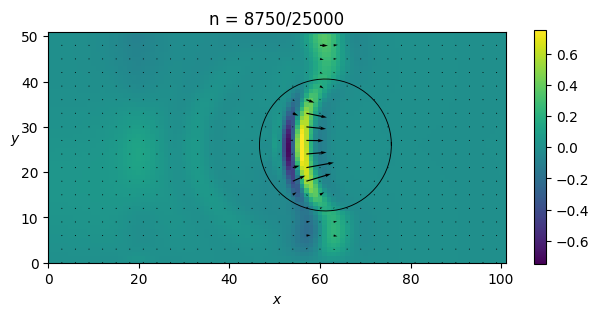

In [ ]:
# GRAFICADO PROVISIONAL
plt.close()

p = 0.35
t = int(p*Nt)

# Geometria opaca
if geom_type == "Opaca_arbitraria":
  plt.imshow(geo,cmap="inferno",vmin=0,vmax=1,origin="lower")

# Campo eléctrico
#plt.quiver(X,Y,Ex_q[:,:,t],Ey_q[:,:,t],color[:,:,t],scale=14,units="width")

# Campo de poynting
plt.quiver(X,Y,S[0,:,:,t],S[1,:,:,t],scale=6,units="width")

# Componente del campo
plt.imshow(Ey[:,:,t],vmin=-0.75,vmax=0.75,origin="lower") #,alpha=geo

# Frontera
plt.plot(x,y,"k-",linewidth=0.65)

plt.title(f"n = {t}/{Nt}") #plt.title("Campo Eléctrico")
plt.xlabel("$x$")
plt.ylabel("$y$",rotation=0)
plt.xlim(0,Nx-1)
plt.ylim(0,Ny-1)
plt.colorbar(shrink=0.52)
#plt.clim(-0.75,0.75)

plt.tight_layout()

plt.savefig("%.2f.png"%(p),bbox_inches="tight",dpi=200)

In [ ]:
#                       ANIMACIÓN
# Configuración
T_anim = 15  # segundos
num_fps = 35
num_frames = T_anim * num_fps
Coef_prop = int(Nt / num_frames)
interpol = "none"
alfa = geo

# Crear la figura y los ejes
fig, ax = plt.subplots()
ax.set_facecolor("black")

# Inicializar los gráficos
# Campo eléctrico
#quiver = ax.quiver(X, Y, Ex_q[:,:,0], Ey_q[:,:,0], color[:,:,0], scale=14, units="width")
# Poynting
#quiver = ax.quiver(X, Y, S[0,:,:,0], S[1,:,:,0], scale=8, units="width")
# Componente del campo
imshow = ax.imshow(Ey[:,:,0], interpolation=interpol, vmin=-0.75, vmax=0.75, origin="lower")#,alpha=alfa

def update_quiver(n):
    n = Coef_prop * n
    # Actualizar los datos del campo electrico
    #quiver.set_UVC(Ex_q[:,:,n], Ey_q[:,:,n], color[:,:,n])
    # Actualizar los datos del campo de Poynting
    #quiver.set_UVC(S[0,:,:,n], S[1,:,:,n])
    # Actualizar los datos de la imagen
    imshow.set_array(Ey[:,:,n])
    return quiver, imshow

# Configuración de los ejes
ax.plot(x,y,"k-",linewidth=0.65)
ax.set_xlim(0, Nx-1)
ax.set_ylim(0, Ny-1)
ax.set_title("Camponente $E_y$")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.tight_layout()

# Añadir la barra de color
plt.colorbar(imshow, ax=ax, shrink=Ly/Lx, location="right", orientation="vertical")

# Crear la animación
ani = animation.FuncAnimation(fig, update_quiver, frames=num_frames, interval=int(1 / num_fps * 1000), blit=True)

#Guardar la animación
campo = "Ey"

if geometria == False:
  ani.save(f"{campo}_Geom_none_Interpol_{interpol}_Nx={Nx}_Ny={Ny}.mp4",fps=num_fps,dpi=200, extra_args=['-vcodec', 'libx264'])
if geometria == True:
  if geom_type == "Opaca_arbitraria":
    ani.save(f"{campo}_{nom_geom[:-4]}_Opaca_Interpol_{interpol}_Nx={Nx}_Ny={Ny}.mp4",fps=num_fps,dpi=200, extra_args=['-vcodec', 'libx264'])
  else:
    ani.save(f"{campo}_Geom_{geom_type}_n={n_i}_Interpol_{interpol}_Nx={Nx}_Ny={Ny}.mp4",fps=num_fps,dpi=200, extra_args=['-vcodec', 'libx264'])

plt.close()
